# Bike Sharing Count Prediction 

Problem Statement- Bike-sharing system are meant to rent the bicycle and return to the different place for the bike sharing purpose in Washington DC. You are provided with rental data spanning for 2 years. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# to show the figures in the jupyter notebook itself
%matplotlib inline

In [5]:
import datetime

In [139]:
train_bikes = pd.read_csv("train_bikes.csv")
train_bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
train_bikes.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [7]:
train_bikes['datetime'] = pd.to_datetime(train_bikes['datetime'])
train_bikes.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [8]:
train_bikes['Hour'] = train_bikes['datetime'].dt.hour

In [9]:
train_bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [11]:
train_bikes['weekday'] = train_bikes['datetime'].dt.dayofweek

In [25]:
train_bikes['Year'] = train_bikes['datetime'].dt.year

In [26]:
train_bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Hour,weekday,Year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,5,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,5,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,5,2011


In [39]:
print('the unique values of season are {}'.format(train_bikes['season'].unique()))
print('the unique values of holiday are {}'.format(train_bikes['holiday'].unique()))
print('the unique values of workingday are {}'.format(train_bikes['workingday'].unique()))
print('the unique values of weather are {}'.format(train_bikes['weather'].unique()))
print('the unique values of windspeed are {}'.format(train_bikes['windspeed'].unique()))
print('the unique values of casual are {}'.format(train_bikes['casual'].unique()))
print('the unique values of Hour are {}'.format(train_bikes['Hour'].unique()))
print('the unique values of weekday are {}'.format(train_bikes['weekday'].unique()))
print('the unique values of Year are {}'.format(train_bikes['Year'].unique()))

the unique values of season are [1 2 3 4]
the unique values of holiday are [0 1]
the unique values of workingday are [0 1]
the unique values of weather are [1 2 3 4]
the unique values of windspeed are [ 0.      6.0032 16.9979 19.0012 19.9995 12.998  15.0013  8.9981 11.0014
 22.0028 30.0026 23.9994 27.9993 26.0027  7.0015 32.9975 36.9974 31.0009
 35.0008 39.0007 43.9989 40.9973 51.9987 46.0022 50.0021 43.0006 56.9969
 47.9988]
the unique values of casual are [  3   8   5   0   2   1  12  26  29  47  35  40  41  15   9   6  11   4
   7  16  20  19  10  13  14  18  17  21  33  23  22  28  48  52  42  24
  30  27  32  58  62  51  25  31  59  45  73  55  68  34  38 102  84  39
  36  43  46  60  80  83  74  37  70  81 100  99  54  88  97 144 149 124
  98  50  72  57  71  67  95  90 126 174 168 170 175 138  92  56 111  89
  69 139 166 219 240 147 148  78  53  63  79 114  94  85 128  93 121 156
 135 103  44  49  64  91 119 167 181 179 161 143  75  66 109 123 113  65
  86  82 132 129 196 142 12

In [24]:
bike_X_columns = [x for x in train_bikes.columns if x not in ['datetime','count']]
bike_X_columns

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'casual',
 'registered',
 'Hour',
 'weekday']

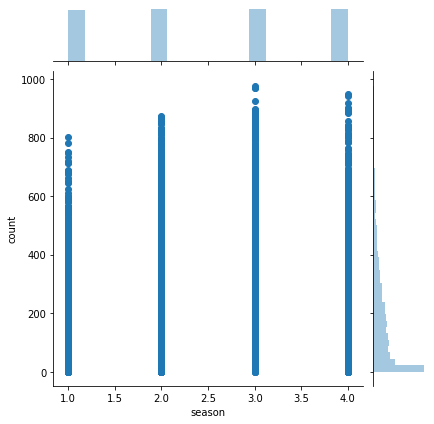

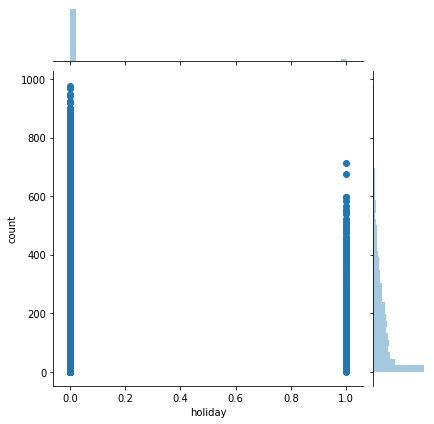

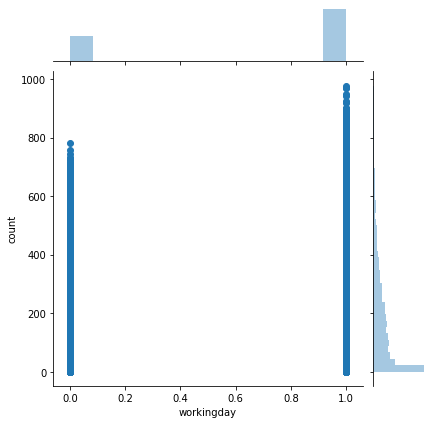

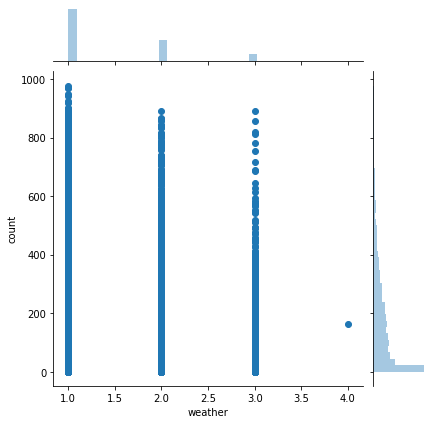

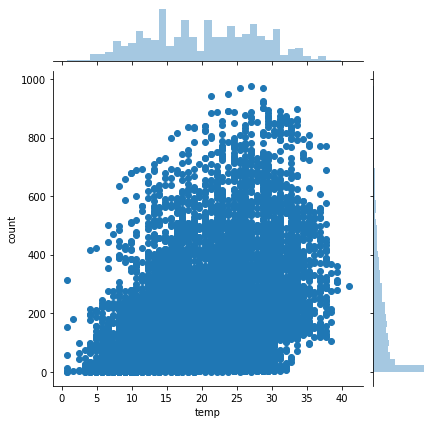

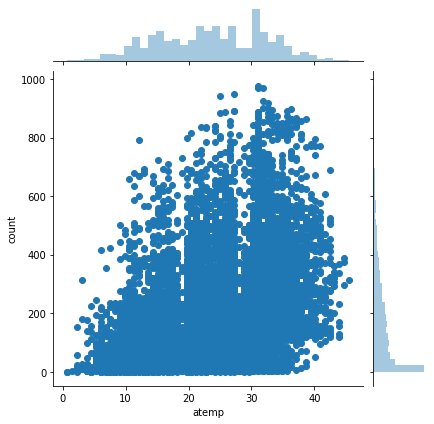

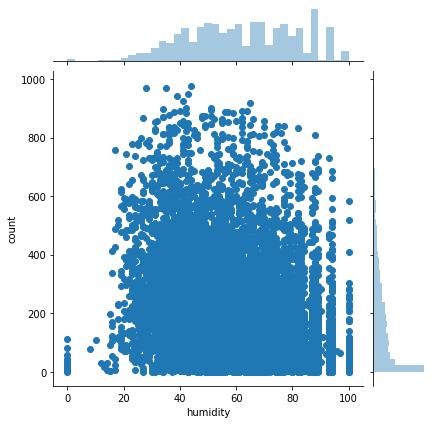

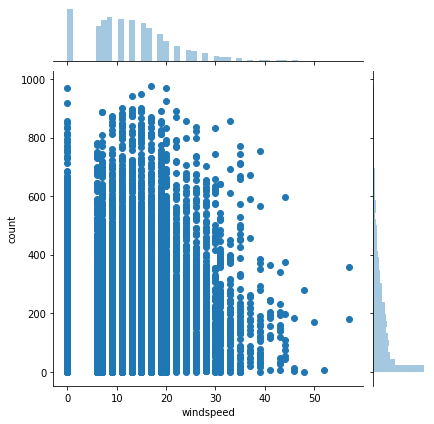

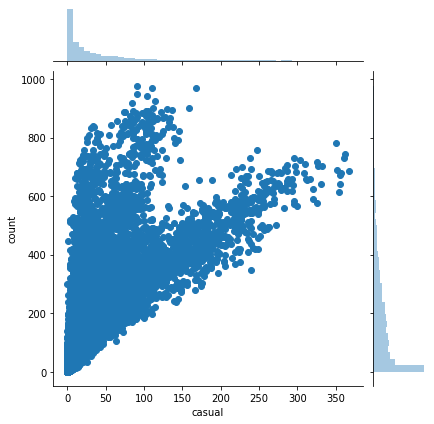

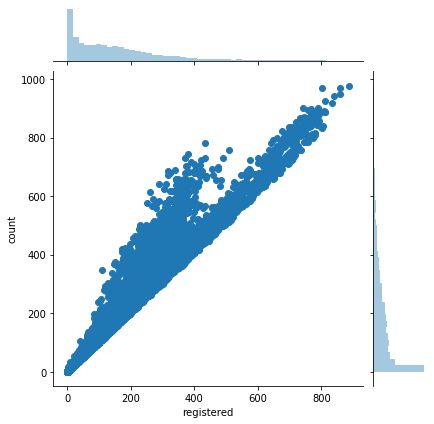

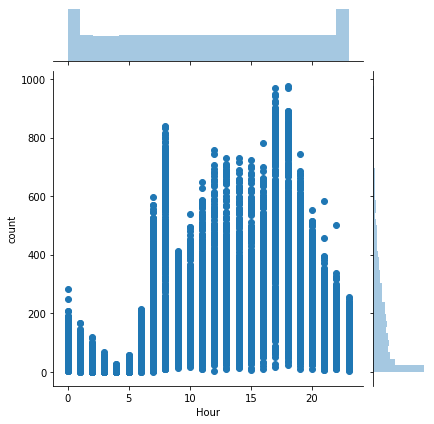

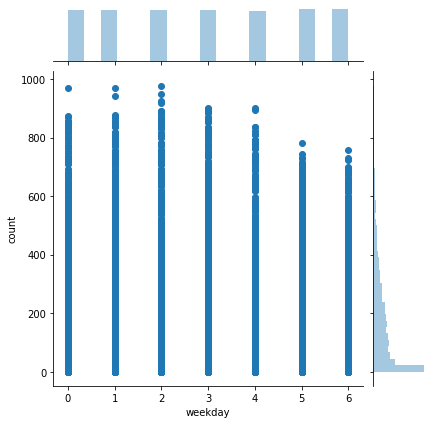

In [27]:
for i in bike_X_columns:
    sns.jointplot(train_bikes[i], train_bikes['count'])

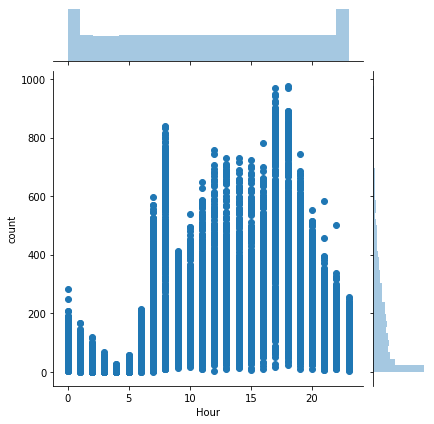

In [19]:
sns.jointplot(train_bikes['Hour'], train_bikes['count'])

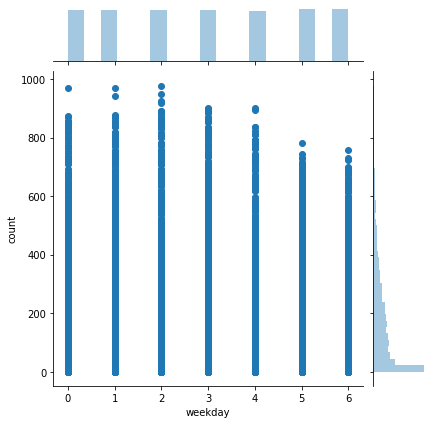

In [20]:
sns.jointplot(train_bikes['weekday'], train_bikes['count'])

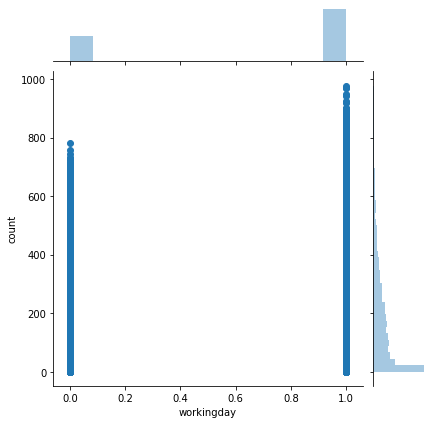

In [21]:
sns.jointplot(train_bikes['workingday'], train_bikes['count'])

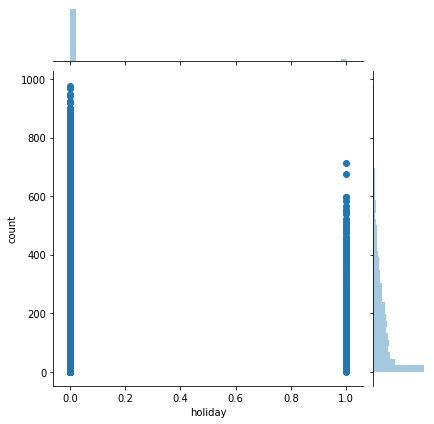

In [22]:
sns.jointplot(train_bikes['holiday'], train_bikes['count'])

In [43]:
cat_columns = ['season',
 'holiday',
 'workingday',
 'weather',
 'Hour',
 'weekday'] 

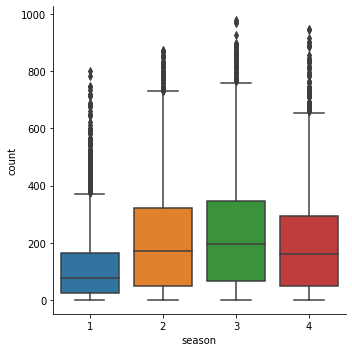

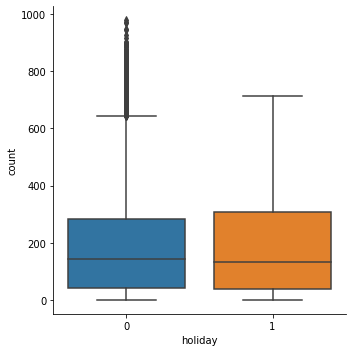

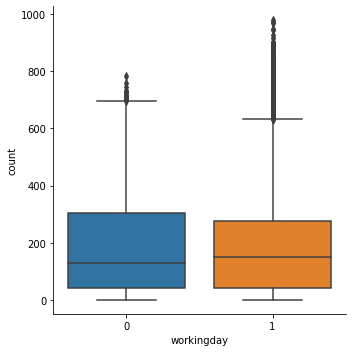

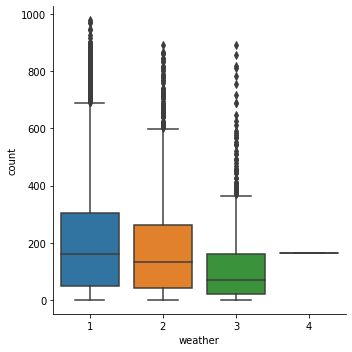

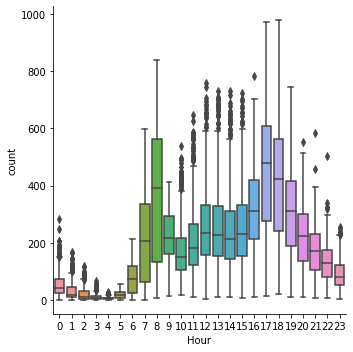

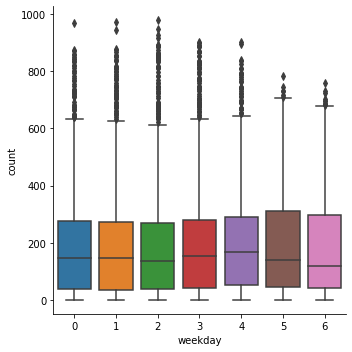

In [44]:
for i in cat_columns:
    sns.catplot(x = i, y = 'count', kind = 'box', data = train_bikes, dodge = False)

In [46]:
for i in bike_X_columns:
    print('The sum of null values of {} is {}'.format(i,train_bikes[i].isnull().sum()))

The sum of null values of season is 0
The sum of null values of holiday is 0
The sum of null values of workingday is 0
The sum of null values of weather is 0
The sum of null values of temp is 0
The sum of null values of atemp is 0
The sum of null values of humidity is 0
The sum of null values of windspeed is 0
The sum of null values of casual is 0
The sum of null values of registered is 0
The sum of null values of Hour is 0
The sum of null values of weekday is 0


In [64]:
train_bikes.groupby(['Year','Hour'])['count'].sum()

Year  Hour
2011  0         9889
      1         6064
      2         4267
      3         2122
      4         1130
      5         3252
      6        13057
      7        35664
      8        60149
      9        37339
      10       29934
      11       35543
      12       43819
      13       43774
      14       41607
      15       42796
      16       54015
      17       80679
      18       73426
      19       53812
      20       39518
      21       30579
      22       23674
      23       15870
2012  0        15199
      1         9308
      2         5992
      3         2969
      4         1702
      5         5683
      6        21641
      7        61304
      8       104911
      9        63571
      10       49733
      11       60314
      12       73149
      13       73777
      14       69403
      15       73164
      16       90251
      17      133078
      18      123046
      19       89955
      20       64686
      21       48478
      22       37237
  

In [65]:
train_bikes.groupby(['Year','Hour'])['count'].sum().unstack()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Year,,,,,,,,,,,,,,,,,,,,,
2011,9889,6064,4267,2122,1130,3252,13057,35664,60149,37339,...,41607,42796,54015,80679,73426,53812,39518,30579,23674,15870
2012,15199,9308,5992,2969,1702,5683,21641,61304,104911,63571,...,69403,73164,90251,133078,123046,89955,64686,48478,37237,24946


In [83]:
# method for creating the count plot based on hour for a given year 
def plot_by_hour_year(data, year=year):
    df = data
    if year: 
        df = df[ df['Year'] == year ]
        by_hour_year = df.groupby(['Hour','workingday'])['count'].sum().unstack()
        
    
    return by_hour_year.plot(kind='bar', ylim=(0, 80000), figsize=(12,8), width=0.9, title="Year = {}".format(year)) # returning the figure grouped by hour


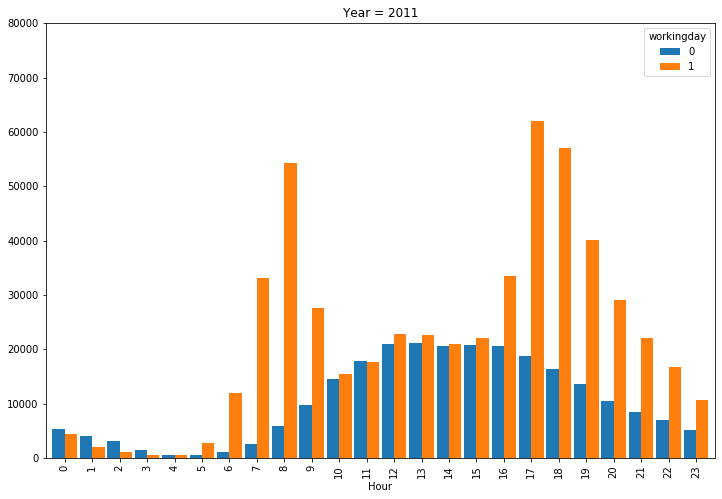

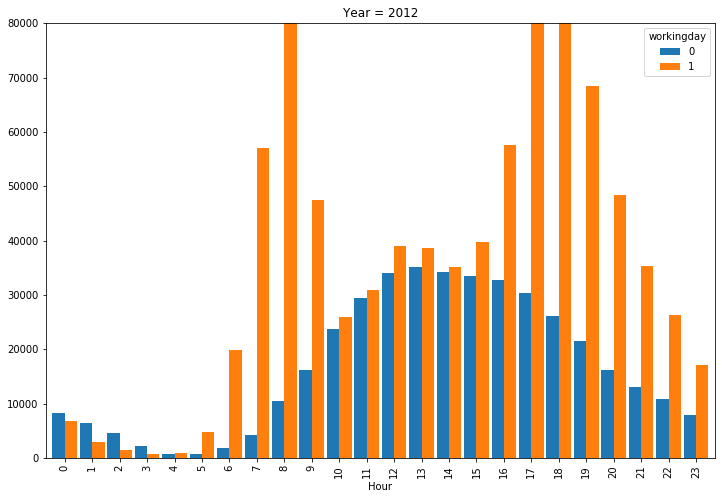

In [85]:
plot_by_hour_year(train_bikes, year=2011)
plot_by_hour_year(train_bikes, year=2012)

In [86]:
# method for creating the count plot based on hour for a given year 
def plot_by_hour_year(data, year=year):
    df = data
    if year: 
        df = df[ df['Year'] == year ]
        by_hour_year = df.groupby(['workingday','Hour'])['count'].sum().unstack()
        
    
    return by_hour_year.plot(kind='bar', ylim=(0, 80000), figsize=(12,8), width=0.9, title="Year = {}".format(year)) # returning the figure grouped by hour


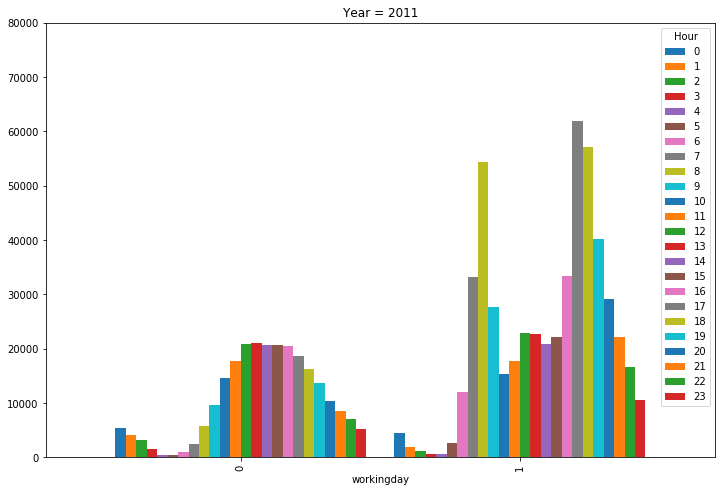

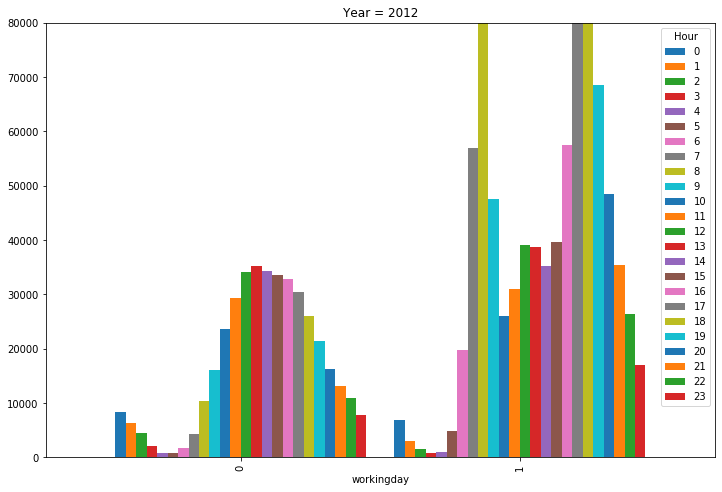

In [87]:
plot_by_hour_year(train_bikes, year=2011)
plot_by_hour_year(train_bikes, year=2012)

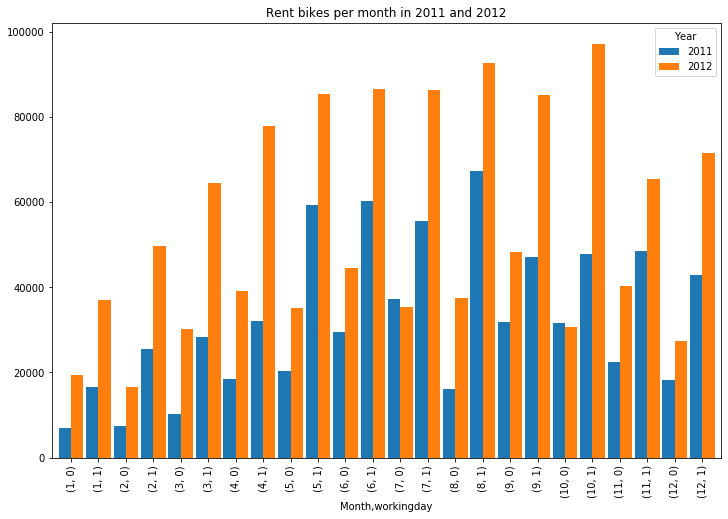

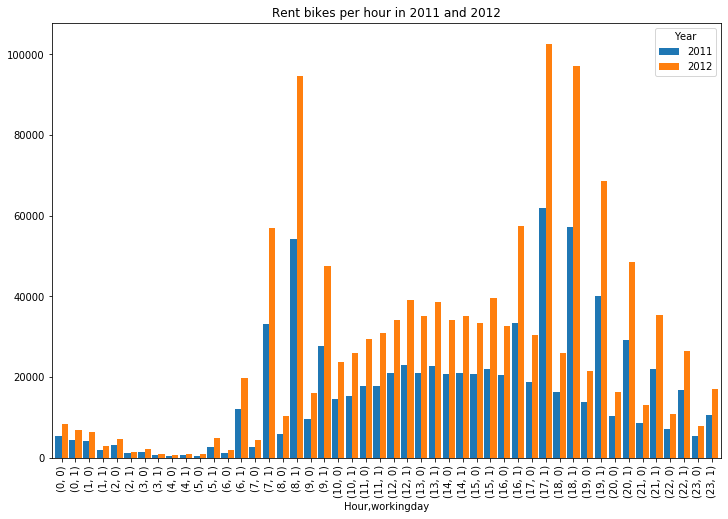

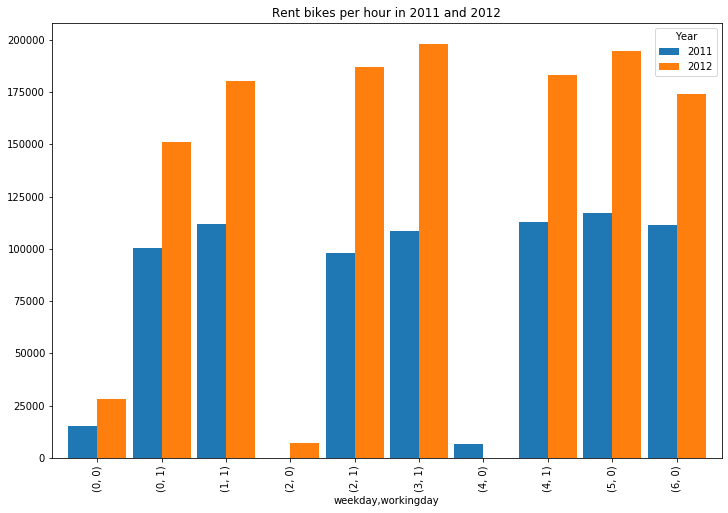

In [91]:
# method for creating the count plot based on year 
def plot_by_year(agg_attr, title):
    # extracting the required fields
    df = train_bikes.copy()
    df['Month'] = df.datetime.dt.month # extratcing the month
        
    by_year = df.groupby([agg_attr,'workingday','Year'])['count'].agg('sum').unstack() # groupby year
    return by_year.plot(kind='bar', figsize=(12,8), width=0.9, title=title) # returning the figure grouped by year


plot_by_year('Month', "Rent bikes per month in 2011 and 2012") # plotting monthly bike rentals based on year
plot_by_year('Hour', "Rent bikes per hour in 2011 and 2012") # plotting hours bike rentals based  on year
plot_by_year('weekday', "Rent bikes per hour in 2011 and 2012") # plotting hours bike rentals based  on year

In [117]:
# method to plot a graph for count per hour
def plot_hours(data, message = ''):
    df = train_bikes.copy()
       
    hours = {}
    for hour in range(24):
        hours[hour] = train_bikes[ train_bikes.Hour == hour ]['count'].values
       

    plt.figure(figsize=(20,10))
    plt.ylabel("Count rent")
    plt.xlabel("Hours")
    plt.title("count vs hours\n" + message)
    plt.boxplot( [hours[hour] for hour in range(24)] )
    
    axis = plt.gca()
    
    axis.set_ylim([1, 1100])
 

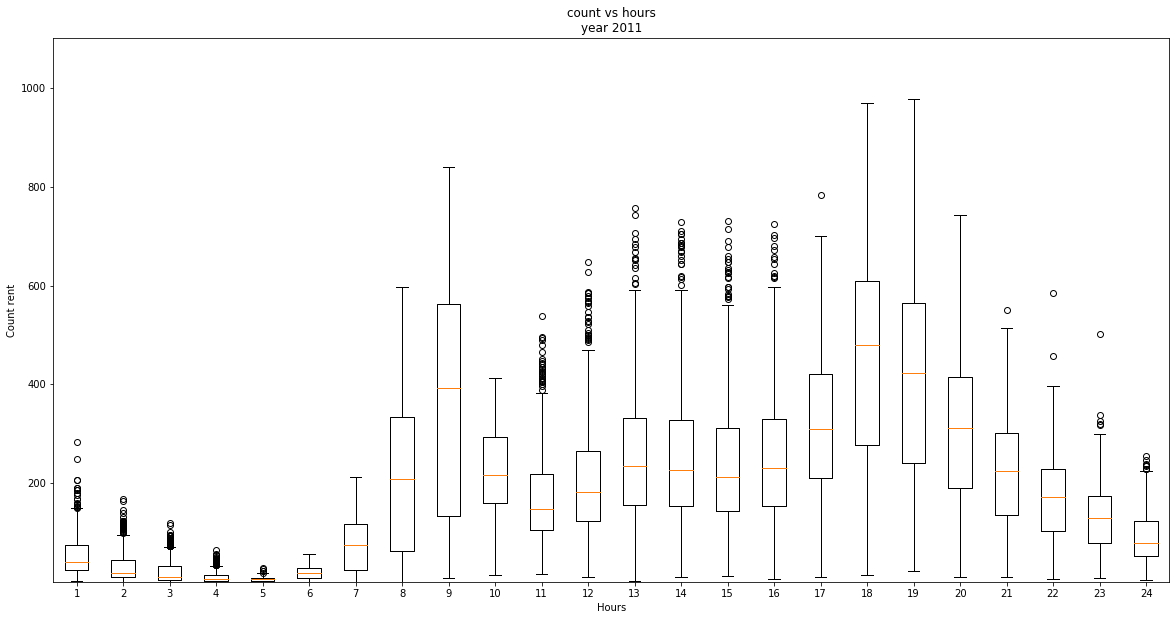

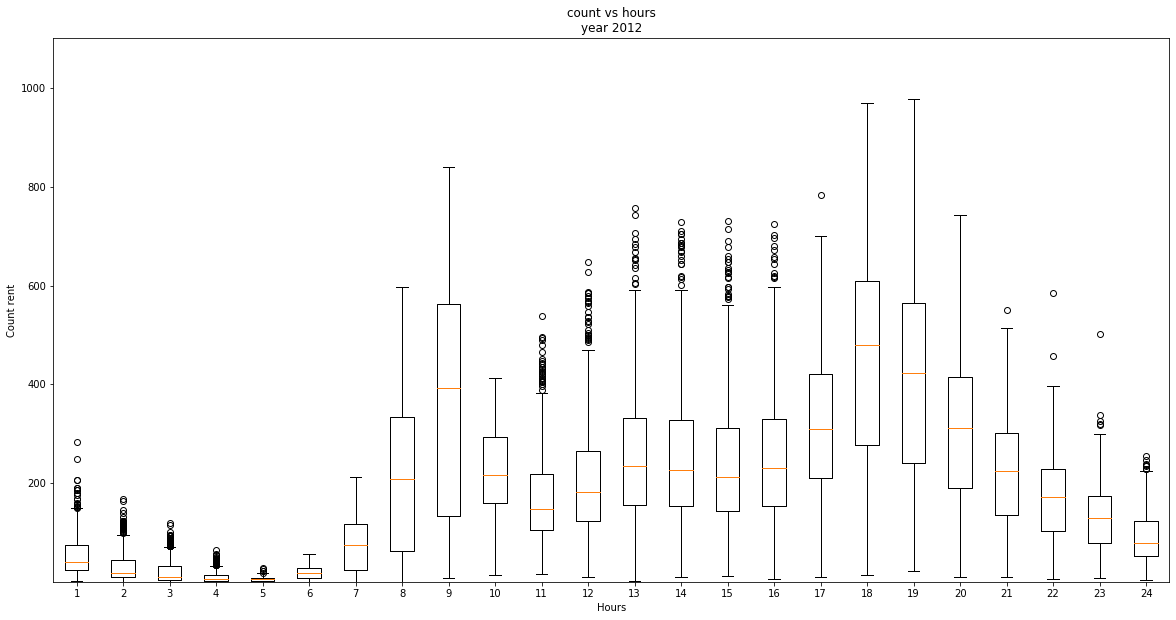

In [118]:
plot_hours( train_bikes[train_bikes.Year == 2011], 'year 2011') # box plot for hourly count for the mentioned year
plot_hours( train_bikes[train_bikes.Year == 2012], 'year 2012') # box plot for hourly count for the mentioned year

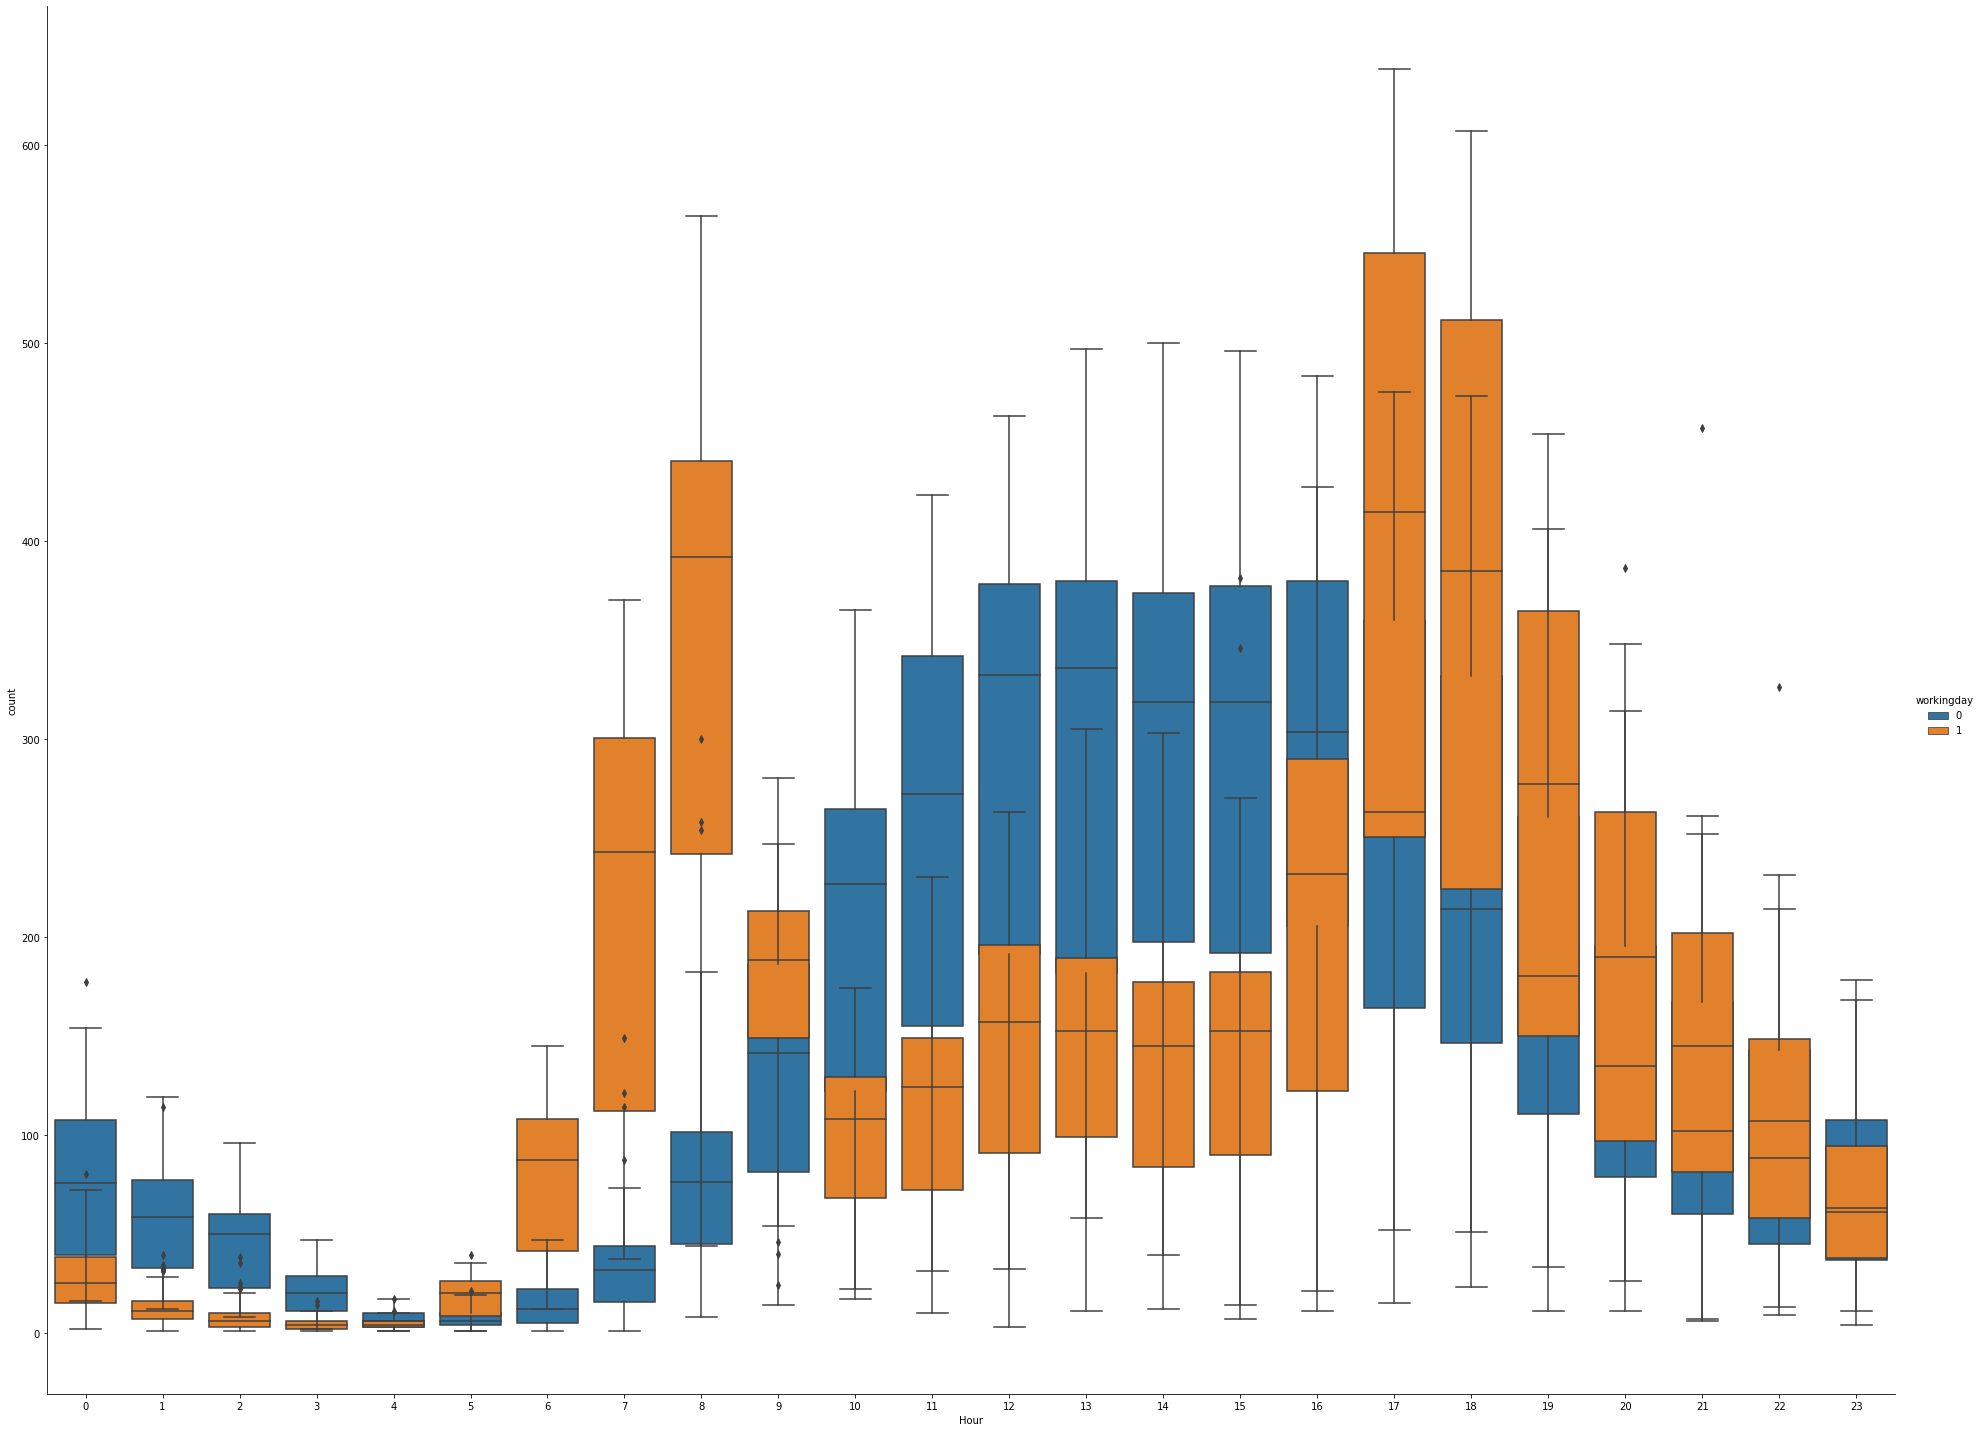

In [132]:

sns.catplot(x = 'Hour', y = 'count', kind = 'box', data = train_bikes[train_bikes.Year == 2011], hue="workingday",height = 20, aspect=20/15,dodge = False)

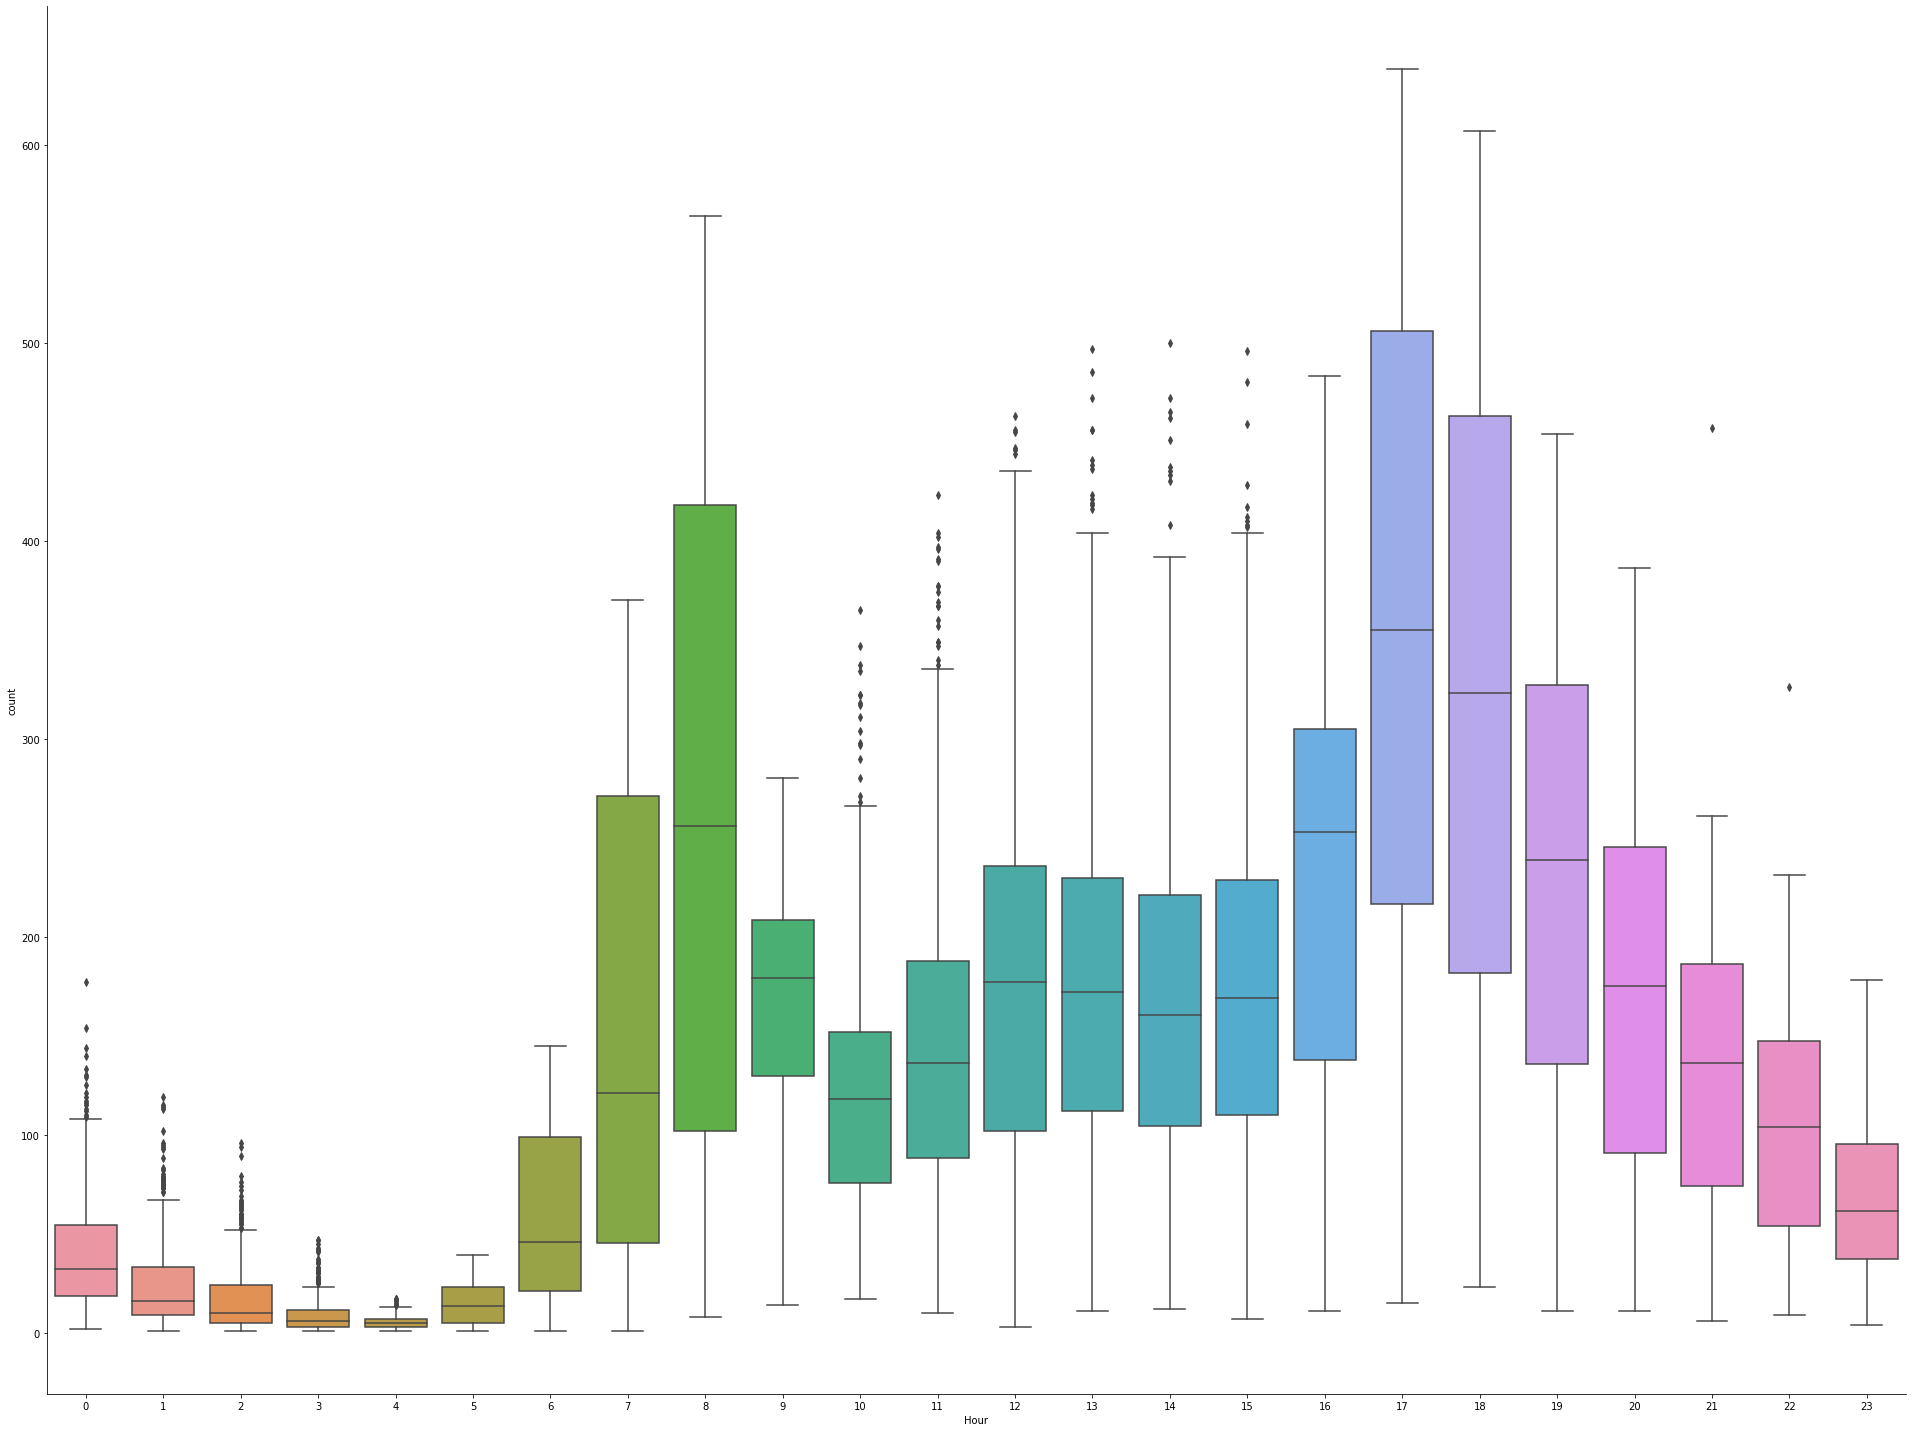

In [133]:

sns.catplot(x = 'Hour', y = 'count', kind = 'box', data = train_bikes[train_bikes.Year == 2011],height = 20, aspect=20/15,dodge = False)

In [134]:
def cat_to_num(x):
    if 0<=x<6:
        return 1
    elif 0<=x<12:
        return 2
    elif 0<=x<18:
        return 3
    else:
        return 4

In [136]:
train_bikes['Hour_cat'] = train_bikes['Hour'].apply(lambda x: cat_to_num(x))
train_bikes['Hour_cat']

0        1
1        1
2        1
3        1
4        1
        ..
10881    4
10882    4
10883    4
10884    4
10885    4
Name: Hour_cat, Length: 10886, dtype: int64

In [137]:
train_bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Hour,weekday,Year,Hour_cat
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5,2011,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,2011,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,5,2011,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,5,2011,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,5,2011,1


In [142]:
def preprocess(data):
    df = data.copy()
    df['datetime'] = pd.to_datetime(df['datetime'])
    df['Hour'] = df['datetime'].dt.hour
    df['Year'] = df['datetime'].dt.year
    df['weekday'] = df['datetime'].dt.dayofweek
    df['month'] = df['datetime'].dt.month
    df['Hour_cat'] = df['Hour'].apply(lambda x: cat_to_num(x))
    df = df.drop(['datetime','Hour'], axis=1)
    return df

In [140]:
train = pd.read_csv("train_bikes.csv")
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [146]:
Train = preprocess(train)
Train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Year,weekday,month,Hour_cat
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,5,1,1
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,5,1,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,5,1,1
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,5,1,1
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,5,1,1


In [147]:
test = pd.read_csv("test_bikes.csv")
Test = preprocess(test)
Test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Year,weekday,month,Hour_cat
0,1,0,1,1,10.66,11.365,56,26.0027,2011,3,1,1
1,1,0,1,1,10.66,13.635,56,0.0000,2011,3,1,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,3,1,1
3,1,0,1,1,10.66,12.880,56,11.0014,2011,3,1,1
4,1,0,1,1,10.66,12.880,56,11.0014,2011,3,1,1


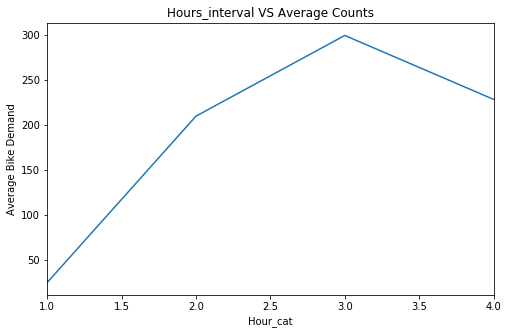

In [153]:
avg_hour_count = Train.groupby(["Hour_cat"]).agg("mean")
figure,axes = plt.subplots(figsize = (8, 5))
plt.title('Hours_interval VS Average Counts')
axes.set_xlabel('Time in Hours')
axes.set_ylabel('Average Bike Demand')
avg_hour_count['count'].plot()

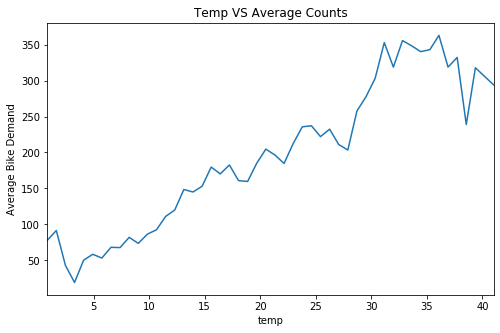

In [161]:
avg_temp_count = Train.groupby(["temp"]).agg("mean")
figure,axes = plt.subplots(figsize = (8, 5))
plt.title('Temp VS Average Counts')
axes.set_xlabel('temp in Hours')
axes.set_ylabel('Average Bike Demand')
avg_temp_count['count'].plot()

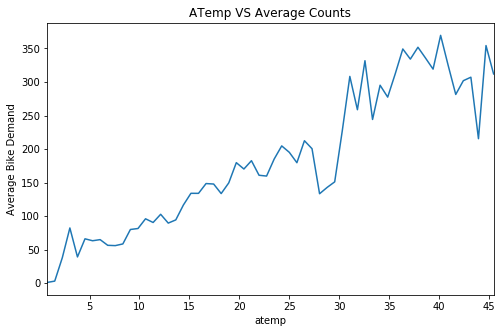

In [164]:
avg_atemp_count = Train.groupby(["atemp"]).agg("mean")
figure,axes = plt.subplots(figsize = (8, 5))
plt.title('ATemp VS Average Counts')
axes.set_xlabel('ATemp in Hours')
axes.set_ylabel('Average Bike Demand')
avg_atemp_count['count'].plot()

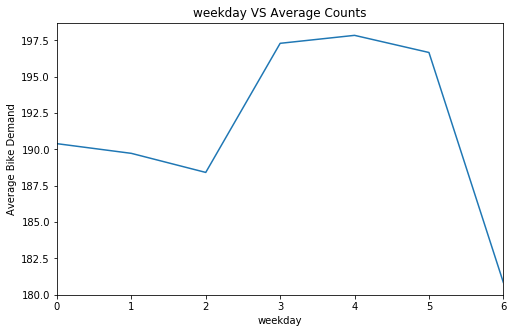

In [165]:
avg_weekday_count = Train.groupby(["weekday"]).agg("mean")
figure,axes = plt.subplots(figsize = (8, 5))
plt.title('weekday VS Average Counts')
axes.set_xlabel('weekday in Hours')
axes.set_ylabel('Average Bike Demand')
avg_weekday_count['count'].plot()

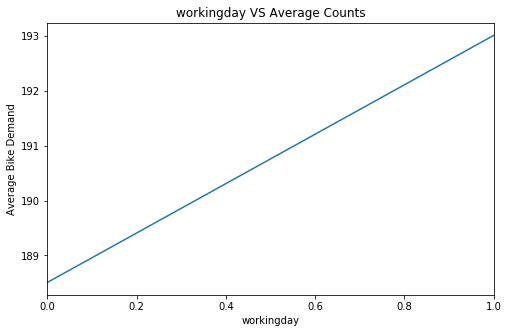

In [168]:
avg_workingday_count = Train.groupby(["workingday"]).agg("mean")
figure,axes = plt.subplots(figsize = (8, 5))
plt.title('workingday VS Average Counts')
axes.set_xlabel('workingday in Hours')
axes.set_ylabel('Average Bike Demand')
avg_workingday_count['count'].plot()

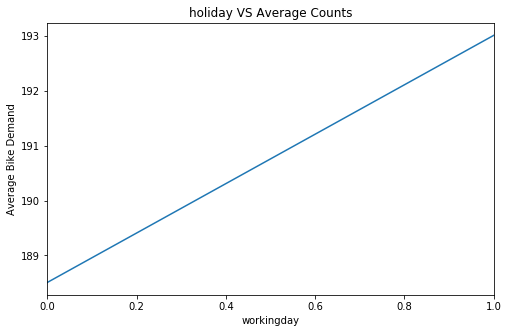

In [169]:
avg_holiday_count = Train.groupby(["holiday"]).agg("mean")
figure,axes = plt.subplots(figsize = (8, 5))
plt.title('holiday VS Average Counts')
axes.set_xlabel('holiday in Hours')
axes.set_ylabel('Average Bike Demand')
avg_workingday_count['count'].plot()

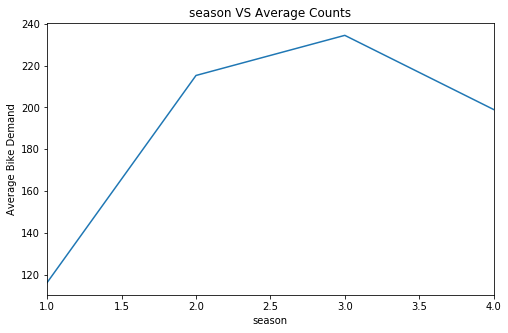

In [171]:
avg_season_count = Train.groupby(["season"]).agg("mean")
figure,axes = plt.subplots(figsize = (8, 5))
plt.title('season VS Average Counts')
axes.set_xlabel('season in Hours')
axes.set_ylabel('Average Bike Demand')
avg_season_count['count'].plot()

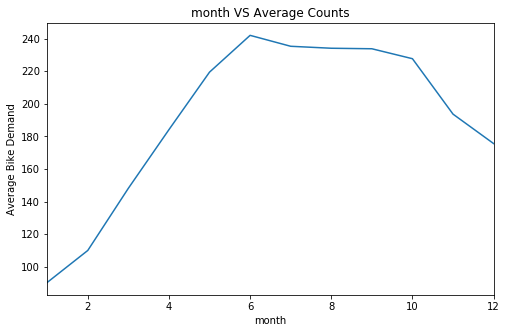

In [172]:
avg_month_count = Train.groupby(["month"]).agg("mean")
figure,axes = plt.subplots(figsize = (8, 5))
plt.title('month VS Average Counts')
axes.set_xlabel('month in Hours')
axes.set_ylabel('Average Bike Demand')
avg_month_count['count'].plot()

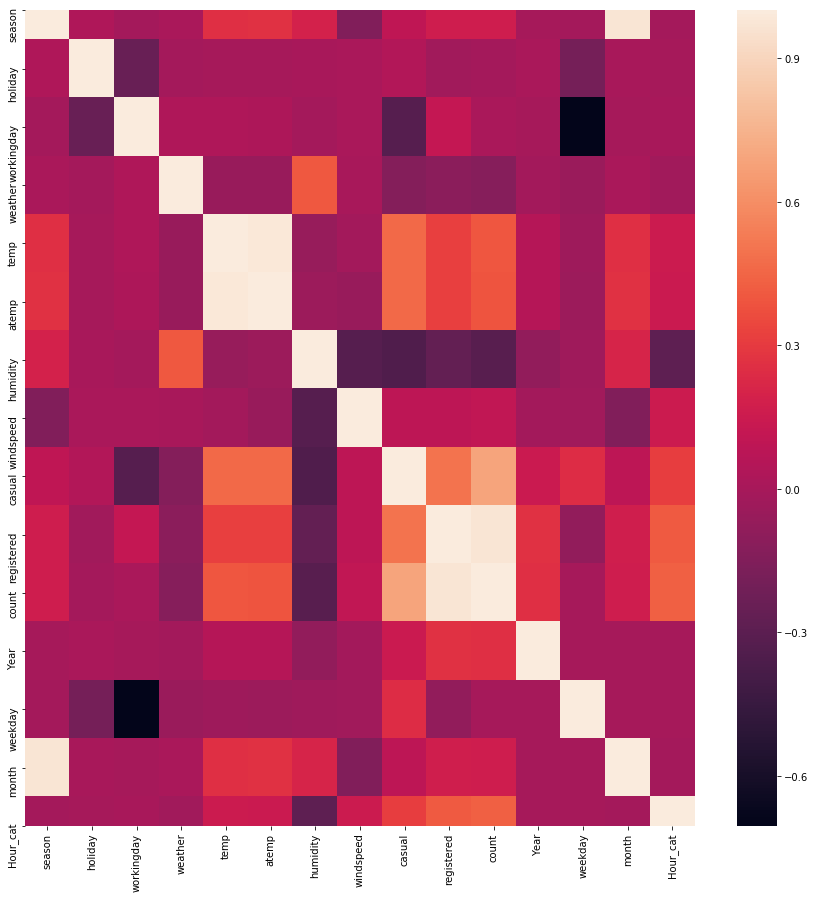

In [173]:
corr = Train.corr()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 15
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [174]:
corr

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Year,weekday,month,Hour_cat
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.004797,-0.010553,0.971524,-0.007340
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.012021,-0.191832,0.001731,-0.000402
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.002482,-0.704267,-0.003394,0.002975
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.012548,-0.047692,0.012144,-0.022127
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.061226,-0.038466,0.257589,0.148428
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.058540,-0.040235,0.264173,0.143400
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.078606,-0.026507,0.204537,-0.285974
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.015221,-0.024804,-0.150192,0.149285
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.145241,0.246959,0.092722,0.308472
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.264265,-0.084427,0.169451,0.412465


In [177]:
corr.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'Year',
       'weekday', 'month', 'Hour_cat'],
      dtype='object')

In [187]:
corr_features = []
for i in range(len(corr)-1):
    if abs(corr.iloc[i,10])>=0.5:  
                print(i)
                print('---')
                print(corr.columns[i])
#corr_features 

8
---
casual
9
---
registered
10
---
count
